In [ ]:
# Instalar las librerías necesarias
!pip install -q ultralytics roboflow
print("¡Ultralytics y Roboflow instalados!")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 95.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 145.0 MB/s eta 0:00:00
¡Ultralytics y Roboflow instalados!


In [ ]:
from roboflow import Roboflow
import os

rf = Roboflow(api_key="OM4F0VZn2AsMfFvICgeE")
project = rf.workspace("super-rze6a").project("chess-pieces-mjzgj-g9zpz")
version = project.version(1)
dataset = version.download("yolov8")

# Guardamos la ruta al archivo .yaml del dataset
DATA_YAML_PATH = os.path.join(dataset.location, "data.yaml")
# Guardamos la ruta base del dataset
DATASET_LOCATION = dataset.location

print(f"Dataset descargado en: {DATASET_LOCATION}")
print(f"Archivo de configuración: {DATA_YAML_PATH}")

loading Roboflow workspace...
loading Roboflow project...
Dataset descargado en: /content/chess-pieces-1
Archivo de configuración: /content/chess-pieces-1/data.yaml


In [ ]:
import yaml
import os

print(f"Corrigiendo el archivo: {DATA_YAML_PATH}...")

# 1. Leer el archivo YAML
with open(DATA_YAML_PATH, 'r') as f:
    data = yaml.safe_load(f)

# 2. Corregir las rutas
# (dataset.location ya es la ruta absoluta, ej: /content/chess-pieces-1)
data['path'] = DATASET_LOCATION
data['train'] = os.path.join(DATASET_LOCATION, 'train/images')
data['val'] = os.path.join(DATASET_LOCATION, 'valid/images')
data['test'] = os.path.join(DATASET_LOCATION, 'test/images')

# 3. Sobrescribir el archivo YAML con las rutas corregidas
with open(DATA_YAML_PATH, 'w') as f:
    yaml.dump(data, f)

print("¡Archivo data.yaml corregido con rutas absolutas!")
print("--- Contenido Nuevo ---")
!cat {DATA_YAML_PATH}

Corrigiendo el archivo: /content/chess-pieces-1/data.yaml...
¡Archivo data.yaml corregido con rutas absolutas!
--- Contenido Nuevo ---
names:
- bishop
- black-bishop
- black-king
- black-knight
- black-pawn
- black-queen
- black-rook
- white-bishop
- white-king
- white-knight
- white-pawn
- white-queen
- white-rook
nc: 13
path: /content/chess-pieces-1
roboflow:
  license: CC BY 4.0
  project: chess-pieces-mjzgj-g9zpz
  url: https://universe.roboflow.com/super-rze6a/chess-pieces-mjzgj-g9zpz/dataset/1
  version: 1
  workspace: super-rze6a
test: /content/chess-pieces-1/test/images
train: /content/chess-pieces-1/train/images
val: /content/chess-pieces-1/valid/images


In [ ]:
from ultralytics import RTDETR

# 1. Cargamos el modelo RT-DETR
model = RTDETR('rtdetr-l.pt')

# 2. Definimos la carpeta de resultados
NOMBRE_RUN = 'rtdetr_ajedrez_test_30_epochs'

# 3. ¡A entrenar!
print(f"¡¡Comenzando el fine-tuning con Ultralytics!!")
print(f"Resultados se guardarán en: /content/runs/detect/{NOMBRE_RUN}")

model.train(
    data=DATA_YAML_PATH,  # Nuestro .yaml corregido
    epochs=30,            # 30 epochs para la prueba
    imgsz=640,
    name=NOMBRE_RUN       # Nombre de la carpeta de resultados
)

print("¡Entrenamiento con Ultralytics completado!")

¡¡Comenzando el fine-tuning con Ultralytics!!
Resultados se guardarán en: /content/runs/detect/rtdetr_ajedrez_test_30_epochs
Ultralytics 8.3.222 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/chess-pieces-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=rtdetr-l.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=rtdetr_

grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


       1/30        12G      1.845      8.412     0.7636        116        640: 100% ━━━━━━━━━━━━ 13/13 0.5it/s 24.7s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 2/2 0.4it/s 5.5s
                   all         58        386     0.0975      0.164     0.0127    0.00723

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


       2/30      11.9G       1.26      4.437      0.579        196        640: 100% ━━━━━━━━━━━━ 13/13 0.9it/s 13.7s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 2/2 2.0it/s 1.0s
                   all         58        386    0.00485      0.081    0.00325    0.00219

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


       3/30      12.2G      1.108      2.078     0.4834         57        640: 100% ━━━━━━━━━━━━ 13/13 1.0it/s 13.5s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 2/2 1.9it/s 1.0s
                   all         58        386      0.352      0.188      0.045     0.0333

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


       4/30      12.1G     0.4331      1.574     0.1114        184        640: 100% ━━━━━━━━━━━━ 13/13 1.0it/s 13.6s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 2/2 1.9it/s 1.1s
                   all         58        386      0.685     0.0758     0.0785     0.0557

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


       5/30      12.4G     0.3307      1.321    0.07381        162        640: 100% ━━━━━━━━━━━━ 13/13 0.9it/s 13.8s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 2/2 1.8it/s 1.1s
                   all         58        386      0.863      0.187      0.187       0.14

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


       6/30      12.2G      0.324     0.9864    0.07216        167        640: 100% ━━━━━━━━━━━━ 13/13 0.9it/s 14.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 2/2 1.8it/s 1.1s
                   all         58        386      0.603      0.377      0.368      0.255

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


       7/30      12.6G     0.3344     0.8114    0.07543         97        640: 100% ━━━━━━━━━━━━ 13/13 0.9it/s 14.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 2/2 1.8it/s 1.1s
                   all         58        386      0.663      0.587      0.591      0.451

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


       8/30      12.1G     0.3359     0.6883    0.06788        215        640: 100% ━━━━━━━━━━━━ 13/13 0.9it/s 13.8s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 2/2 1.8it/s 1.1s
                   all         58        386      0.768       0.78      0.813      0.622

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


       9/30      12.1G     0.3138     0.6164    0.06542        127        640: 100% ━━━━━━━━━━━━ 13/13 0.9it/s 13.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 2/2 1.8it/s 1.1s
                   all         58        386      0.862      0.844      0.841      0.631

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      10/30      12.4G     0.2962     0.5478    0.05929        173        640: 100% ━━━━━━━━━━━━ 13/13 0.9it/s 13.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 2/2 1.8it/s 1.1s
                   all         58        386      0.875      0.913      0.896      0.682

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      11/30      12.5G     0.2925     0.4964     0.0621        212        640: 100% ━━━━━━━━━━━━ 13/13 0.9it/s 13.8s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 2/2 1.8it/s 1.1s
                   all         58        386      0.863      0.953      0.937      0.709

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      12/30      11.8G     0.2756     0.4766    0.05857        125        640: 100% ━━━━━━━━━━━━ 13/13 0.9it/s 13.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 2/2 1.8it/s 1.1s
                   all         58        386      0.893      0.945      0.931      0.719

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      13/30      12.5G     0.2865     0.4564    0.06033        209        640: 100% ━━━━━━━━━━━━ 13/13 0.9it/s 13.8s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 2/2 1.8it/s 1.1s
                   all         58        386      0.927      0.967       0.97      0.748

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      14/30      11.8G     0.2857     0.4418    0.05752        157        640: 100% ━━━━━━━━━━━━ 13/13 0.9it/s 13.7s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 2/2 1.8it/s 1.1s
                   all         58        386      0.931      0.978      0.979      0.773

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      15/30      12.2G     0.2908     0.4362    0.06088        141        640: 100% ━━━━━━━━━━━━ 13/13 1.0it/s 13.7s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 2/2 1.8it/s 1.1s
                   all         58        386      0.925      0.968      0.976      0.768

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      16/30        12G     0.2652     0.4132    0.05719        195        640: 100% ━━━━━━━━━━━━ 13/13 1.0it/s 13.6s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 2/2 1.8it/s 1.1s
                   all         58        386      0.921       0.97      0.967      0.727

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      17/30      12.4G     0.2604     0.4131    0.05506        122        640: 100% ━━━━━━━━━━━━ 13/13 1.0it/s 13.6s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 2/2 1.9it/s 1.1s
                   all         58        386      0.961      0.963      0.969      0.744

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      18/30      12.3G      0.271     0.4101    0.05814        139        640: 100% ━━━━━━━━━━━━ 13/13 1.0it/s 13.6s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 2/2 1.8it/s 1.1s
                   all         58        386      0.973      0.964      0.974      0.763

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      19/30      12.3G     0.2654     0.3969    0.05464        155        640: 100% ━━━━━━━━━━━━ 13/13 0.9it/s 13.8s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 2/2 1.8it/s 1.1s
                   all         58        386      0.964      0.969      0.984      0.747

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      20/30      11.9G     0.2584     0.3901    0.05321        212        640: 100% ━━━━━━━━━━━━ 13/13 0.9it/s 13.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 2/2 1.8it/s 1.1s
                   all         58        386      0.964       0.98      0.981      0.777
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      21/30      12.6G     0.2296     0.3672     0.0558        137        640: 100% ━━━━━━━━━━━━ 13/13 0.8it/s 15.6s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 2/2 1.8it/s 1.1s
                   all         58        386      0.971      0.976      0.986      0.788

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      22/30      12.4G     0.2254     0.3614    0.05665         82        640: 100% ━━━━━━━━━━━━ 13/13 0.9it/s 13.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 2/2 1.8it/s 1.1s
                   all         58        386      0.972      0.971      0.984      0.792

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      23/30      12.4G     0.2143     0.3483    0.05059        108        640: 100% ━━━━━━━━━━━━ 13/13 0.9it/s 13.8s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 2/2 1.8it/s 1.1s
                   all         58        386       0.97      0.969      0.974      0.786

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      24/30      12.4G     0.2093     0.3523    0.05191         71        640: 100% ━━━━━━━━━━━━ 13/13 0.9it/s 13.8s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 2/2 1.8it/s 1.1s
                   all         58        386      0.976      0.976       0.98      0.791

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      25/30      12.6G     0.2132     0.3443    0.05281        133        640: 100% ━━━━━━━━━━━━ 13/13 0.9it/s 13.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 2/2 1.8it/s 1.1s
                   all         58        386      0.983      0.983      0.983      0.791

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      26/30      12.4G      0.223     0.3531    0.05673         89        640: 100% ━━━━━━━━━━━━ 13/13 1.0it/s 13.6s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 2/2 1.8it/s 1.1s
                   all         58        386      0.986      0.989      0.985      0.783

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      27/30      12.9G     0.2127     0.3472    0.05311        122        640: 100% ━━━━━━━━━━━━ 13/13 0.9it/s 13.8s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 2/2 1.8it/s 1.1s
                   all         58        386      0.983      0.989      0.987      0.795

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      28/30      12.4G     0.2107      0.339    0.05057        103        640: 100% ━━━━━━━━━━━━ 13/13 0.9it/s 13.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 2/2 1.8it/s 1.1s
                   all         58        386      0.982      0.991      0.987       0.78

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      29/30      12.4G     0.2124     0.3384    0.05304         70        640: 100% ━━━━━━━━━━━━ 13/13 0.9it/s 13.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 2/2 1.8it/s 1.1s
                   all         58        386      0.985      0.989      0.985      0.783

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:93.)


      30/30      12.5G     0.2102     0.3354    0.05209         94        640: 100% ━━━━━━━━━━━━ 13/13 0.9it/s 13.7s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 2/2 1.8it/s 1.1s
                   all         58        386      0.985      0.991      0.988      0.798

30 epochs completed in 0.164 hours.
Optimizer stripped from /content/runs/detect/rtdetr_ajedrez_test_30_epochs/weights/last.pt, 66.3MB
Optimizer stripped from /content/runs/detect/rtdetr_ajedrez_test_30_epochs/weights/best.pt, 66.3MB

Validating /content/runs/detect/rtdetr_ajedrez_test_30_epochs/weights/best.pt...
Ultralytics 8.3.222 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
rt-detr-l summary: 302 layers, 32,010,455 parameters, 0 gradients, 103.5 GFLOPs
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 2/2 1.6it/s 1.3s
                   all         58        386      0.985      0.9

Cargando modelo entrenado desde: /content/runs/detect/rtdetr_ajedrez_test_30_epochs/weights/best.pt
Realizando predicción en la imagen: /content/chess-pieces-1/valid/images/55be99616328f83dcbfe8c18e1387c0e_jpg.rf.e63103e8bd7c9c53da7d9ea3e41d1bde.jpg

image 1/1 /content/chess-pieces-1/valid/images/55be99616328f83dcbfe8c18e1387c0e_jpg.rf.e63103e8bd7c9c53da7d9ea3e41d1bde.jpg: 640x640 1 black-king, 1 black-knight, 4 black-pawns, 1 black-rook, 1 white-bishop, 1 white-king, 3 white-pawns, 1 white-queen, 1 white-rook, 61.6ms
Speed: 1.7ms preprocess, 61.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/rtdetr_ajedrez_test_30_epochs/predicciones_test
Mostrando resultados...


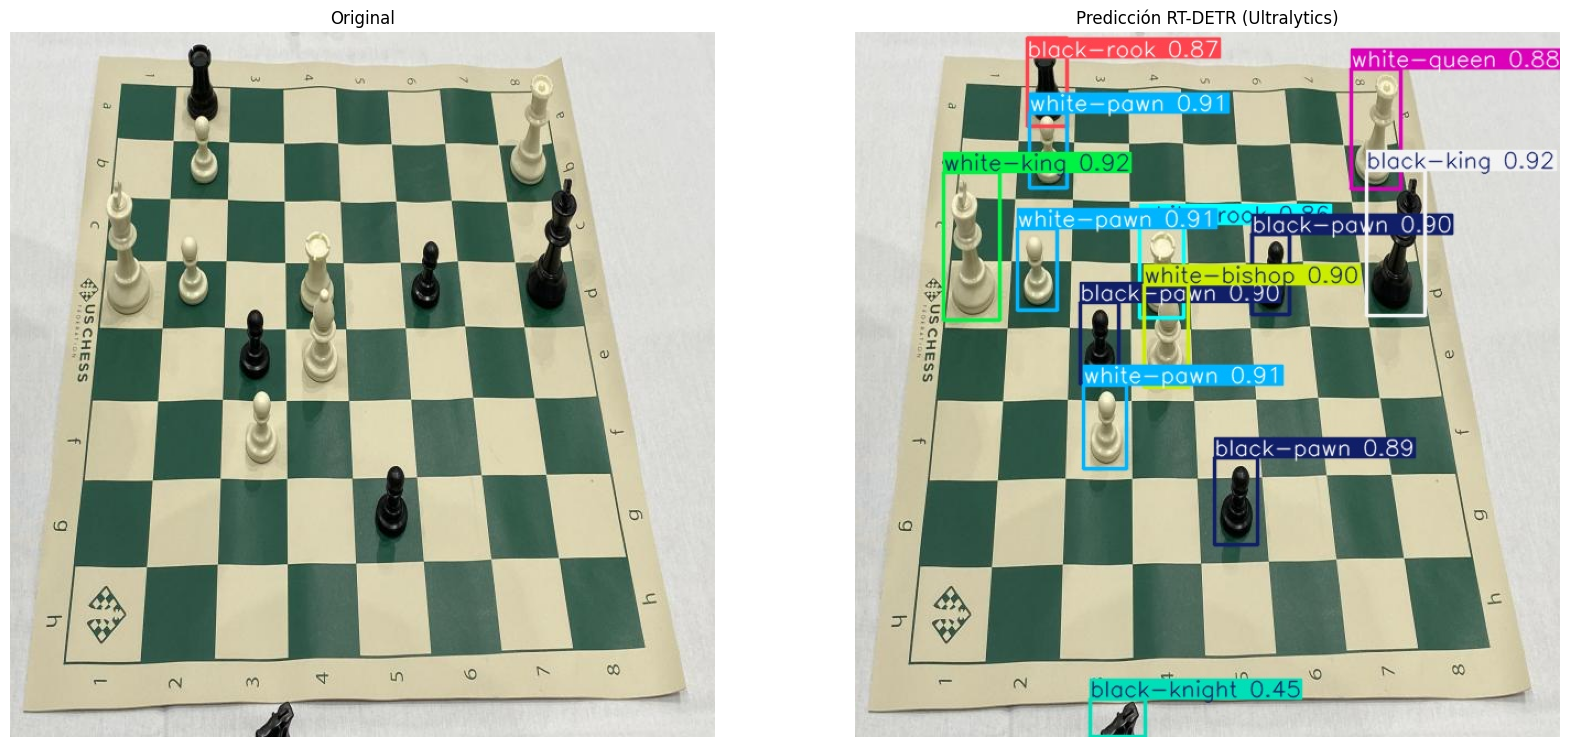

In [ ]:
from ultralytics import RTDETR
import os
import glob
import cv2
import matplotlib.pyplot as plt

# 1. Definimos las rutas del modelo y las imágenes
RUN_PATH = f'/content/runs/detect/{NOMBRE_RUN}'
MODEL_PATH = os.path.join(RUN_PATH, 'weights/best.pt')
VALID_IMAGES_PATH = os.path.join(DATASET_LOCATION, 'valid/images')
PREDICT_SAVE_DIR = os.path.join(RUN_PATH, 'predicciones_test')

# 2. Cargamos nuestro modelo entrenado
print(f"Cargando modelo entrenado desde: {MODEL_PATH}")
model_entrenado = RTDETR(MODEL_PATH)

# 3. Buscamos una imagen de prueba
# glob.glob encuentra todos los archivos .jpg y tomamos el primero
test_image_path = glob.glob(os.path.join(VALID_IMAGES_PATH, '*.jpg'))[0]
print(f"Realizando predicción en la imagen: {test_image_path}")

# 4. ¡Hacemos la predicción con Python!
# save=True guarda la imagen con las cajas dibujadas
results = model_entrenado.predict(
    source=test_image_path,
    save=True,
    project=RUN_PATH, # Guardar dentro de nuestra carpeta de run
    name='predicciones_test' # Subcarpeta
)

# --- 5. Mostrar la imagen (reemplaza tu vieja Celda 6) ---
print("Mostrando resultados...")

# La imagen original
img_original = cv2.imread(test_image_path)
img_original = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)

# La imagen predicha (Ultralytics la guarda en /project/name/)
predicted_img_path = os.path.join(PREDICT_SAVE_DIR, os.path.basename(test_image_path))
img_predicha = cv2.imread(predicted_img_path)
img_predicha = cv2.cvtColor(img_predicha, cv2.COLOR_BGR2RGB)

# Mostrar lado a lado
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(img_original)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Predicción RT-DETR (Ultralytics)')
plt.imshow(img_predicha)
plt.axis('off')
plt.show()

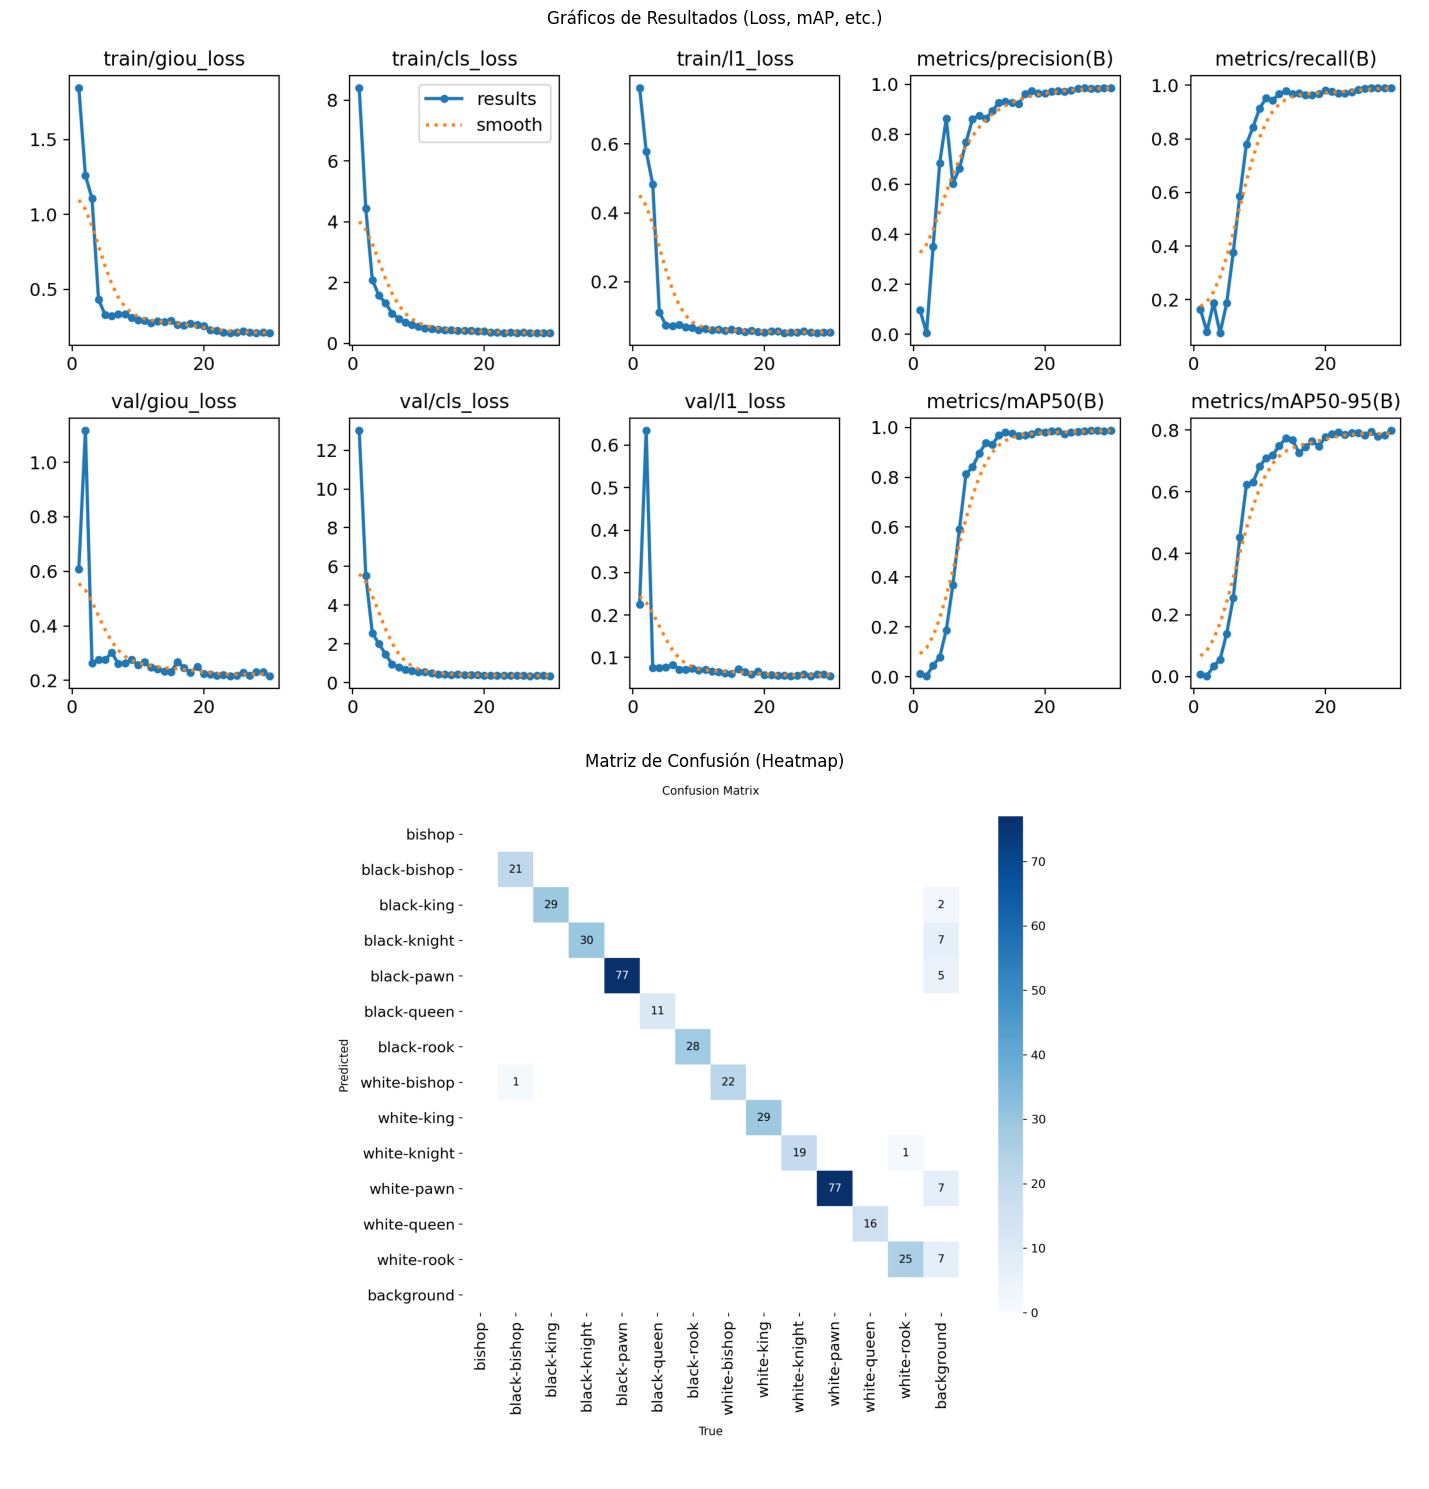

In [ ]:
import cv2
import matplotlib.pyplot as plt

# --- Rutas de los gráficos de métricas (CORREGIDAS) ---
# (RUN_PATH fue definido en la celda anterior)
results_path = os.path.join(RUN_PATH, 'results.png')
confusion_matrix_path = os.path.join(RUN_PATH, 'confusion_matrix.png')
# --------------------------------------------------

try:
    img_results = cv2.imread(results_path)
    img_results = cv2.cvtColor(img_results, cv2.COLOR_BGR2RGB)

    img_cm = cv2.imread(confusion_matrix_path)
    img_cm = cv2.cvtColor(img_cm, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(20, 15))

    plt.subplot(2, 1, 1)
    plt.title('Gráficos de Resultados (Loss, mAP, etc.)')
    plt.imshow(img_results)
    plt.axis('off')

    plt.subplot(2, 1, 2)
    plt.title('Matriz de Confusión (Heatmap)')
    plt.imshow(img_cm)
    plt.axis('off')

    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Error: No se pudieron cargar los gráficos.")
    print(f"Asegúrate de que los archivos existen en estas rutas:")
    print(f"Resultados: {results_path}")
    print(f"Matriz de Confusión: {confusion_matrix_path}")

In [ ]:
# --- CELDA DE ARREGLO ---
print("Desinstalando el paquete 'yolov10' incorrecto...")
!pip uninstall -y yolov10

print("Instalando el paquete 'yolov10-ultralytics' OFICIAL...")
!pip install -q yolov10-ultralytics

print("¡Paquete de YOLOv10 OFICIAL instalado!")

Desinstalando el paquete 'yolov10' incorrecto...
Found existing installation: yolov10 0.0.1
Uninstalling yolov10-0.0.1:
  Successfully uninstalled yolov10-0.0.1
Instalando el paquete 'yolov10-ultralytics' OFICIAL...
ERROR: Could not find a version that satisfies the requirement yolov10-ultralytics (from versions: none)
ERROR: No matching distribution found for yolov10-ultralytics
¡Paquete de YOLOv10 OFICIAL instalado!


In [ ]:
from ultralytics import YOLO
import os #


print("Actualizando 'ultralytics' a la última versión...")
!pip install -q --upgrade ultralytics
print("¡Actualización completa!")



# 2. Definimos el nombre de esta nueva carpeta de resultados
NOMBRE_RUN_YOLO = 'yolov10_ajedrez_test_30_epochs'


model_yolo = YOLO('yolov10l.pt')

# 4. ¡A entrenar! (Bajo las mismas condiciones)
print(f"¡¡Comenzando el fine-tuning con YOLOv10!!")
print(f"Resultados se guardarán en: /content/runs/detect/{NOMBRE_RUN_YOLO}")

model_yolo.train(
    data=DATA_YAML_PATH,  # El MISMO .yaml corregido
    epochs=30,            # Las MISMAS 30 epochs
    imgsz=640,
    name=NOMBRE_RUN_YOLO  # El nuevo nombre de la carpeta
)

print("¡Entrenamiento con YOLOv10 completado!")

Actualizando 'ultralytics' a la última versión...
¡Actualización completa!
¡¡Comenzando el fine-tuning con YOLOv10!!
Resultados se guardarán en: /content/runs/detect/yolov10_ajedrez_test_30_epochs
Ultralytics 8.3.222 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/chess-pieces-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=

Mostrando resultados...


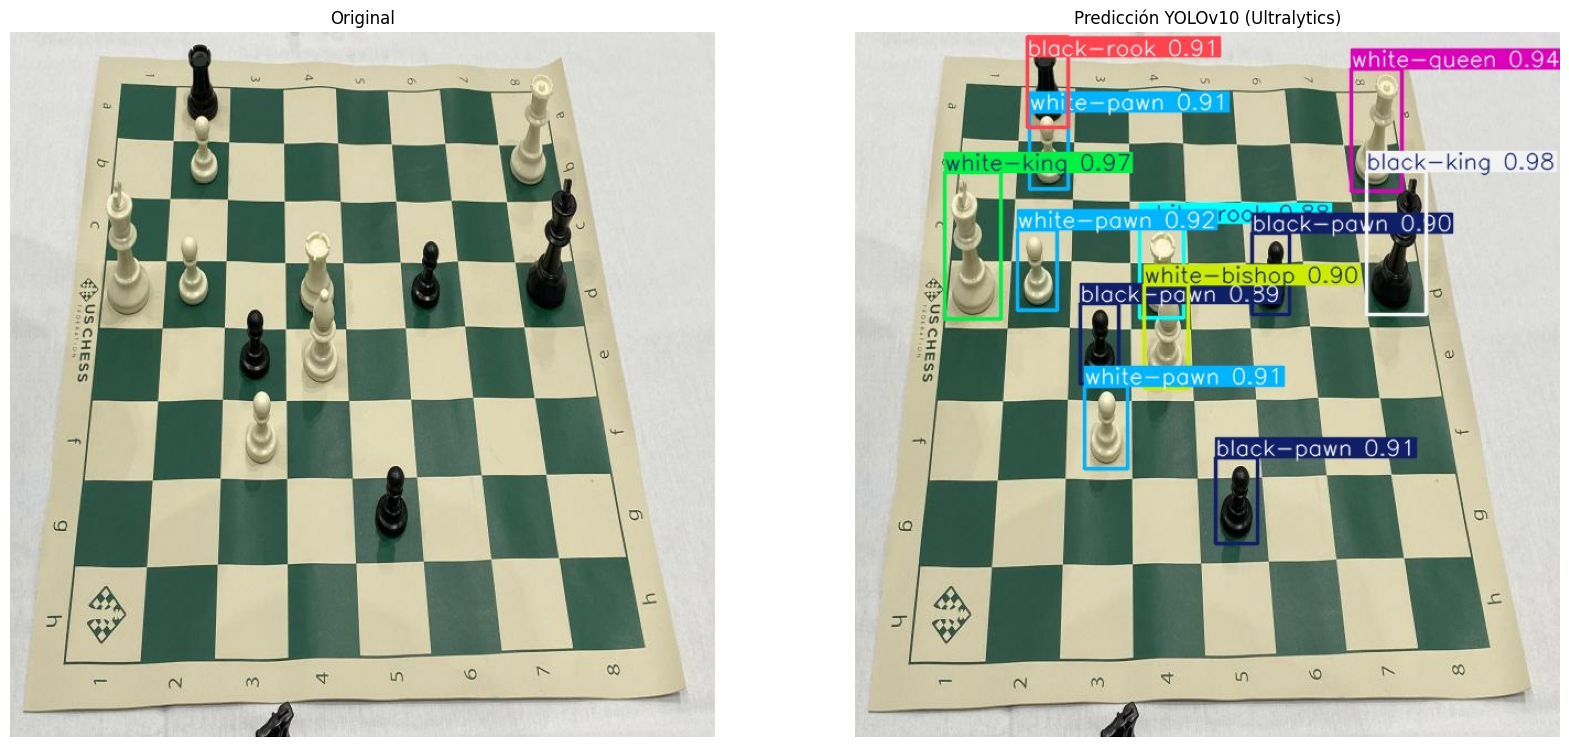

In [ ]:
from ultralytics import YOLO
import os
import glob
import cv2
import matplotlib.pyplot as plt

# 1. Definimos las rutas (esto ya está cargado en memoria, pero lo dejamos por claridad)
RUN_PATH_YOLO = f'/content/runs/detect/{NOMBRE_RUN_YOLO}'
MODEL_PATH_YOLO = os.path.join(RUN_PATH_YOLO, 'weights/best.pt')
VALID_IMAGES_PATH = os.path.join(DATASET_LOCATION, 'valid/images')
PREDICT_SAVE_DIR_YOLO = os.path.join(RUN_PATH_YOLO, 'predicciones_test')
test_image_path = glob.glob(os.path.join(VALID_IMAGES_PATH, '*.jpg'))[0]

# --- 5. Mostrar la imagen (CON LA CORRECCIÓN) ---
print("Mostrando resultados...")

# La imagen original
img_original = cv2.imread(test_image_path)
# --- ¡CORRECCIÓN AQUÍ! ---
img_original = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)

# La imagen predicha
predicted_img_path_yolo = os.path.join(PREDICT_SAVE_DIR_YOLO, os.path.basename(test_image_path))
img_predicha_yolo = cv2.imread(predicted_img_path_yolo)
# --- ¡Y CORRECCIÓN AQUÍ! ---
img_predicha_yolo = cv2.cvtColor(img_predicha_yolo, cv2.COLOR_BGR2RGB)

# Mostrar lado a lado
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(img_original)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Predicción YOLOv10 (Ultralytics)')
plt.imshow(img_predicha_yolo)
plt.axis('off')
plt.show()

Cargando gráficos de YOLOv10...
Gráfico 'results.png' cargado con éxito.
Gráfico 'confusion_matrix.png' cargado con éxito.

Mostrando gráficos...


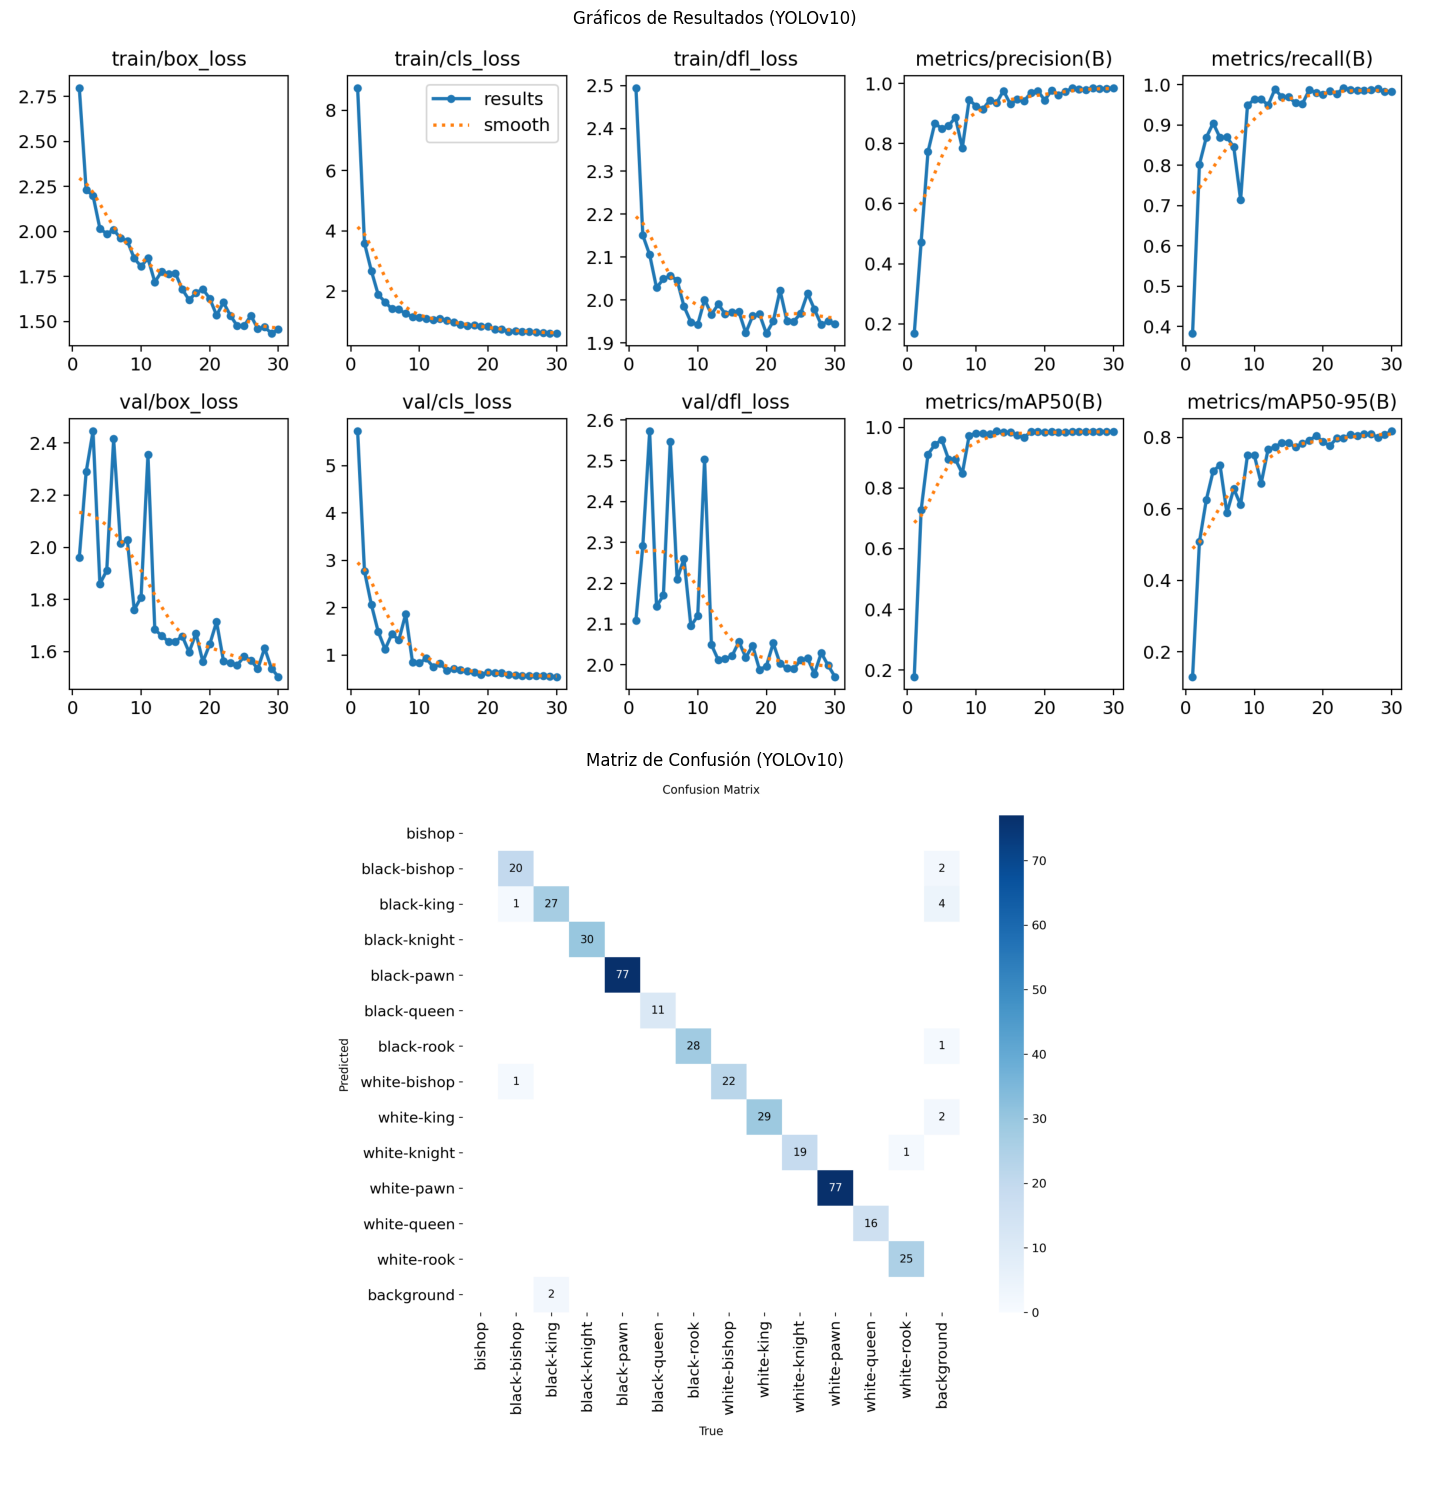

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os

# --- Rutas de los gráficos de métricas (YOLOv10) ---
# (NOMBRE_RUN_YOLO fue definido en tu Celda 7)
RUN_PATH_YOLO = f'/content/runs/detect/{NOMBRE_RUN_YOLO}'
results_path_yolo = os.path.join(RUN_PATH_YOLO, 'results.png')
confusion_matrix_path_yolo = os.path.join(RUN_PATH_YOLO, 'confusion_matrix.png')
# --------------------------------------------------

print("Cargando gráficos de YOLOv10...")
img_results = None
img_cm = None

# --- Intenta cargar el gráfico de Resultados ---
try:
    if not os.path.exists(results_path_yolo):
        print(f"¡ERROR! No se encuentra el archivo: {results_path_yolo}")
    else:
        img_results = cv2.imread(results_path_yolo)
        if img_results is None:
            print(f"¡ERROR! cv2 no pudo leer el archivo: {results_path_yolo}")
        else:
            img_results = cv2.cvtColor(img_results, cv2.COLOR_BGR2RGB)
            print("Gráfico 'results.png' cargado con éxito.")
except Exception as e:
    print(f"Error inesperado al cargar 'results.png': {e}")

# --- Intenta cargar la Matriz de Confusión ---
try:
    if not os.path.exists(confusion_matrix_path_yolo):
        print(f"¡ERROR! No se encuentra el archivo: {confusion_matrix_path_yolo}")
    else:
        img_cm = cv2.imread(confusion_matrix_path_yolo)
        if img_cm is None:
            print(f"¡ERROR! cv2 no pudo leer el archivo: {confusion_matrix_path_yolo}")
        else:
            img_cm = cv2.cvtColor(img_cm, cv2.COLOR_BGR2RGB)
            print("Gráfico 'confusion_matrix.png' cargado con éxito.")
except Exception as e:
    print(f"Error inesperado al cargar 'confusion_matrix.png': {e}")


# --- Mostrar los gráficos (solo si se cargaron) ---
if img_results is not None and img_cm is not None:
    print("\nMostrando gráficos...")
    plt.figure(figsize=(20, 15))

    plt.subplot(2, 1, 1)
    plt.title('Gráficos de Resultados (YOLOv10)')
    plt.imshow(img_results)
    plt.axis('off')

    plt.subplot(2, 1, 2)
    plt.title('Matriz de Confusión (YOLOv10)')
    plt.imshow(img_cm)
    plt.axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("\nNo se pudieron mostrar los gráficos porque uno o ambos archivos no se cargaron correctamente.")

Cargando imagen original de: /content/chess-pieces-1/valid/images/55be99616328f83dcbfe8c18e1387c0e_jpg.rf.e63103e8bd7c9c53da7d9ea3e41d1bde.jpg
Cargando predicción RT-DETR de: /content/runs/detect/rtdetr_ajedrez_test_30_epochs/predicciones_test/55be99616328f83dcbfe8c18e1387c0e_jpg.rf.e63103e8bd7c9c53da7d9ea3e41d1bde.jpg
Cargando predicción YOLOv10 de: /content/runs/detect/yolov10_ajedrez_test_30_epochs/predicciones_test/55be99616328f83dcbfe8c18e1387c0e_jpg.rf.e63103e8bd7c9c53da7d9ea3e41d1bde.jpg


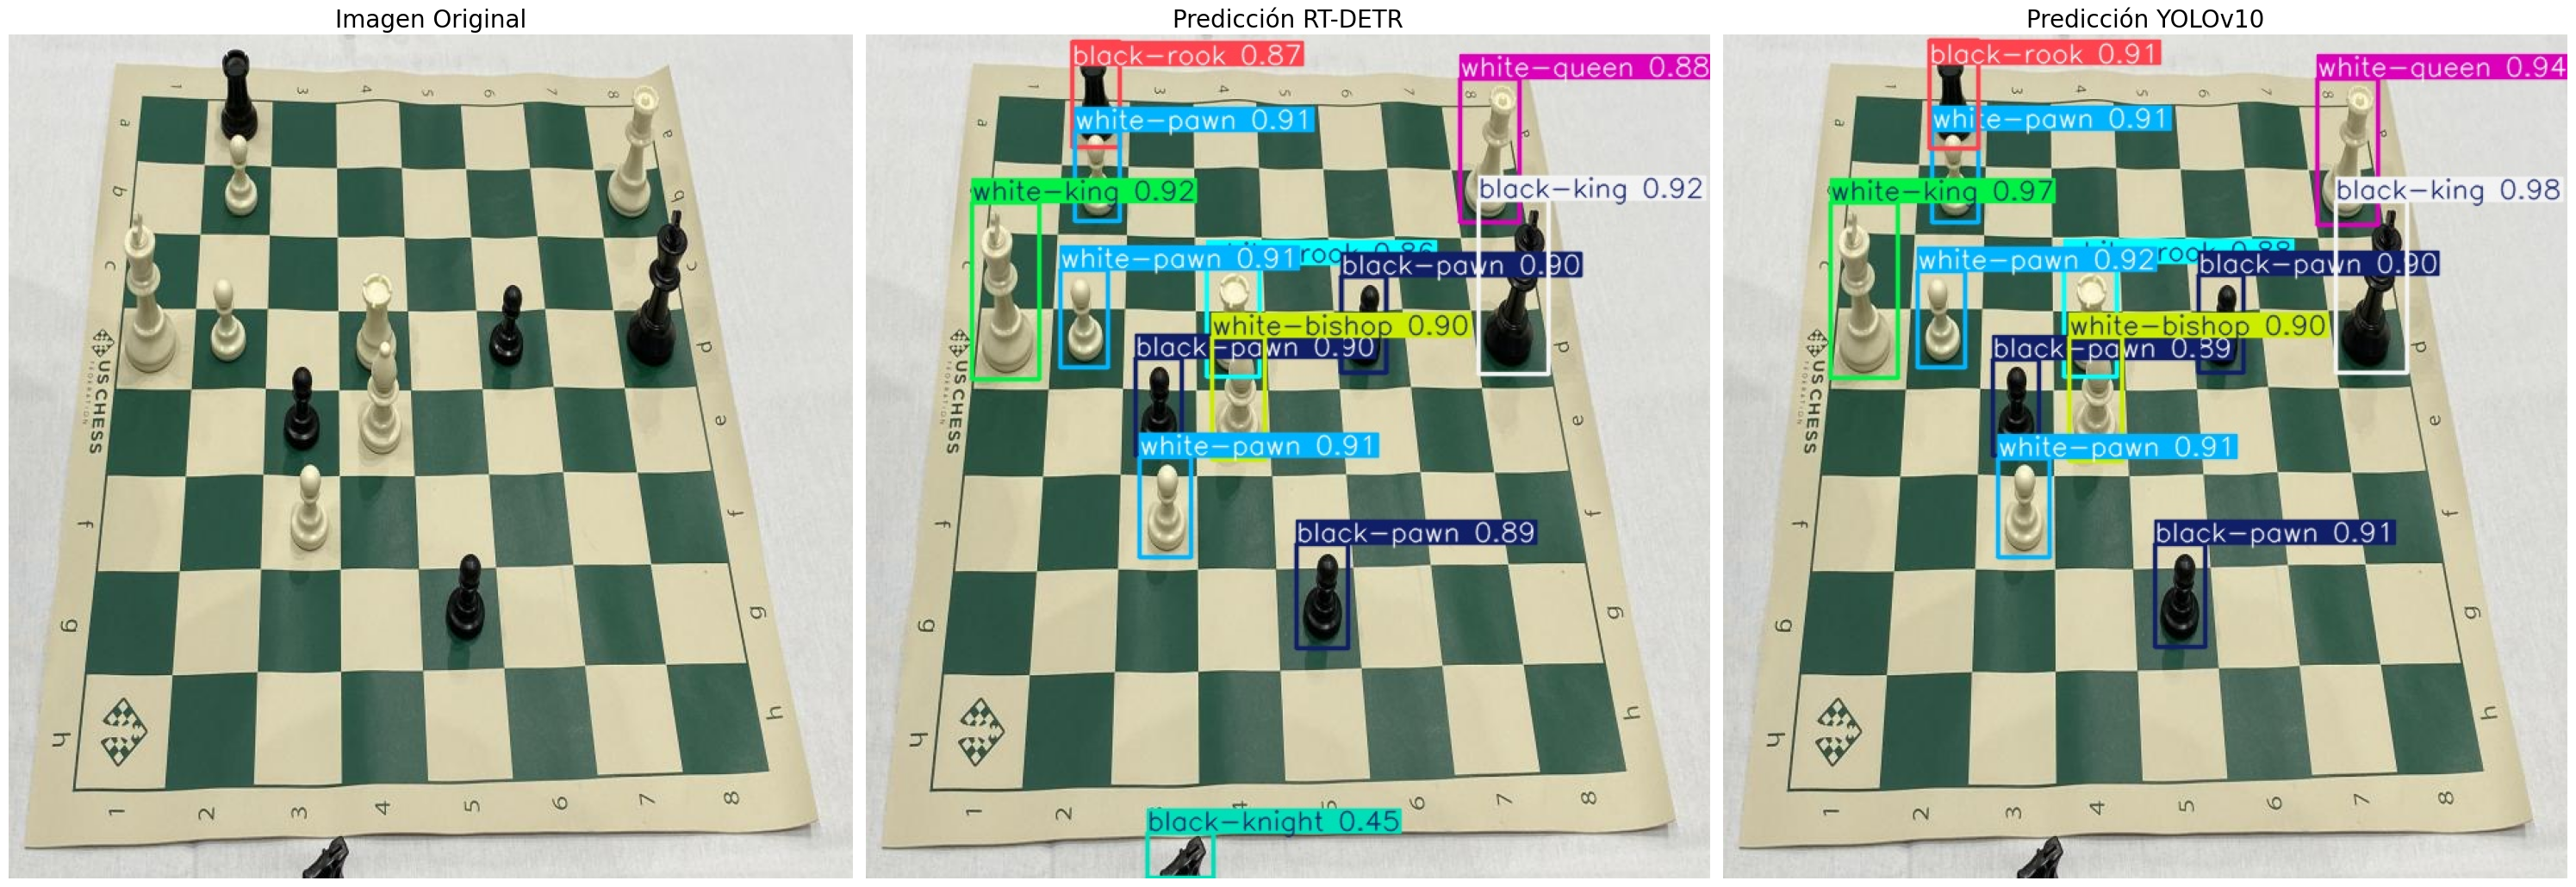

In [ ]:
import cv2
import matplotlib.pyplot as plt
import os
import glob

# --- Rutas del run de RT-DETR (de tu Celda 5) ---
# Necesitamos la ruta de la imagen predicha por RT-DETR
# Asumimos que NOMBRE_RUN sigue siendo 'rtdetr_ajedrez_test_30_epochs' de la Celda 4 original
RUN_PATH_RTDETR = f'/content/runs/detect/rtdetr_ajedrez_test_30_epochs'
PREDICT_SAVE_DIR_RTDETR = os.path.join(RUN_PATH_RTDETR, 'predicciones_test')

# --- Rutas del run de YOLOv10 (de tu Celda 8) ---
# Necesitamos la ruta de la imagen predicha por YOLOv10
# Asumimos que NOMBRE_RUN_YOLO sigue siendo 'yolov10_ajedrez_test_30_epochs' de la Celda 7
RUN_PATH_YOLO = f'/content/runs/detect/{NOMBRE_RUN_YOLO}'
PREDICT_SAVE_DIR_YOLO = os.path.join(RUN_PATH_YOLO, 'predicciones_test')

# --- Ubicamos la imagen de prueba original (de tu Celda 2) ---
VALID_IMAGES_PATH = os.path.join(DATASET_LOCATION, 'valid/images')
test_image_filename = os.path.basename(glob.glob(os.path.join(VALID_IMAGES_PATH, '*.jpg'))[0]) # El nombre del archivo

# --- Construimos las rutas COMPLETAS a las imágenes inferidas ---
rt_detr_predicted_path = os.path.join(PREDICT_SAVE_DIR_RTDETR, test_image_filename)
yolo_predicted_path = os.path.join(PREDICT_SAVE_DIR_YOLO, test_image_filename)
original_image_path = os.path.join(VALID_IMAGES_PATH, test_image_filename)


print(f"Cargando imagen original de: {original_image_path}")
print(f"Cargando predicción RT-DETR de: {rt_detr_predicted_path}")
print(f"Cargando predicción YOLOv10 de: {yolo_predicted_path}")

# --- Cargar las imágenes ---
img_original = cv2.imread(original_image_path)
img_rt_detr = cv2.imread(rt_detr_predicted_path)
img_yolo = cv2.imread(yolo_predicted_path)

# Convertir de BGR a RGB para matplotlib
img_original = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)
img_rt_detr = cv2.cvtColor(img_rt_detr, cv2.COLOR_BGR2RGB)
img_yolo = cv2.cvtColor(img_yolo, cv2.COLOR_BGR2RGB)


# --- Mostrar las imágenes lado a lado ---
plt.figure(figsize=(30, 15)) # Ajustamos el tamaño para 3 imágenes

plt.subplot(1, 3, 1) # 1 fila, 3 columnas, 1ra imagen
plt.title('Imagen Original', fontsize=20)
plt.imshow(img_original)
plt.axis('off')

plt.subplot(1, 3, 2) # 1 fila, 3 columnas, 2da imagen
plt.title('Predicción RT-DETR', fontsize=20)
plt.imshow(img_rt_detr)
plt.axis('off')

plt.subplot(1, 3, 3) # 1 fila, 3 columnas, 3ra imagen
plt.title('Predicción YOLOv10', fontsize=20)
plt.imshow(img_yolo)
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
from ultralytics import RTDETR, YOLO
import os
import glob
import time
import numpy as np
from tqdm import tqdm # Para una barra de progreso

# --- 1. Definir Rutas (de Celdas anteriores) ---
# (Asegúrate de que DATASET_LOCATION y NOMBRE_RUN / NOMBRE_RUN_YOLO son correctos)
VALID_IMAGES_DIR = os.path.join(DATASET_LOCATION, 'valid/images')
RTDETR_MODEL_PATH = f'/content/runs/detect/{NOMBRE_RUN}/weights/best.pt'
YOLO_MODEL_PATH = f'/content/runs/detect/{NOMBRE_RUN_YOLO}/weights/best.pt'

# Buscamos todas las imágenes de validación
validation_images = glob.glob(os.path.join(VALID_IMAGES_DIR, '*.jpg'))
print(f"Benchmark de Inferencia: Se usarán {len(validation_images)} imágenes de validación.")

# --- 2. Cargar Modelos ---
print(f"Cargando RT-DETR desde: {RTDETR_MODEL_PATH}")
model_rtdetr = RTDETR(RTDETR_MODEL_PATH)
print(f"Cargando YOLOv10 desde: {YOLO_MODEL_PATH}")
model_yolo = YOLO(YOLO_MODEL_PATH)

# --- 3. Benchmark RT-DETR ---
print("\n--- Ejecutando Benchmark RT-DETR ---")
rtdetr_times = []

# "Calentamiento" - La primera inferencia siempre es más lenta
model_rtdetr.predict(source=validation_images[0], verbose=False)

# Cronometramos el resto
for img_path in tqdm(validation_images, desc="RT-DETR Inferencia"):
    start_time = time.time()
    # verbose=False para no llenar la pantalla
    model_rtdetr.predict(source=img_path, verbose=False)
    end_time = time.time()
    rtdetr_times.append(end_time - start_time)

# --- 4. Benchmark YOLOv10 ---
print("\n--- Ejecutando Benchmark YOLOv10 ---")
yolo_times = []

# "Calentamiento"
model_yolo.predict(source=validation_images[0], verbose=False)

for img_path in tqdm(validation_images, desc="YOLOv10 Inferencia"):
    start_time = time.time()
    model_yolo.predict(source=img_path, verbose=False)
    end_time = time.time()
    yolo_times.append(end_time - start_time)

# --- 5. Resultados Finales ---
rtdetr_avg_ms = np.mean(rtdetr_times) * 1000  # Convertir a milisegundos
yolo_avg_ms = np.mean(yolo_times) * 1000     # Convertir a milisegundos
rtdetr_fps = 1 / np.mean(rtdetr_times)
yolo_fps = 1 / np.mean(yolo_times)

print("\n\n--- 🏆 RESULTADOS DEL BENCHMARK 🏆 ---")
print("\n[Tiempo de Entrenamiento]")
print(f" (Mira el log de tu Celda 4 para RT-DETR)")
print(f" (Mira el log de tu Celda 7 para YOLOv10)")

print("\n[Tiempo de Inferencia (Promedio en GPU Colab)]")
print(f"  RT-DETR (Large): {rtdetr_avg_ms:.2f} ms por imagen ({rtdetr_fps:.2f} FPS)")
print(f"  YOLOv10 (Large): {yolo_avg_ms:.2f} ms por imagen ({yolo_fps:.2f} FPS)")

if yolo_avg_ms < rtdetr_avg_ms:
    diferencia = rtdetr_avg_ms / yolo_avg_ms
    print(f"\n⚡ ¡YOLOv10 fue {diferencia:.2f} veces más rápido en la inferencia!")
else:
    diferencia = yolo_avg_ms / rtdetr_avg_ms
    print(f"\n⚡ ¡RT-DETR fue {diferencia:.2f} veces más rápido en la inferencia!")

Benchmark de Inferencia: Se usarán 58 imágenes de validación.
Cargando RT-DETR desde: /content/runs/detect/rtdetr_ajedrez_test_30_epochs/weights/best.pt
Cargando YOLOv10 desde: /content/runs/detect/yolov10_ajedrez_test_30_epochs/weights/best.pt

--- Ejecutando Benchmark RT-DETR ---


RT-DETR Inferencia: 100%|██████████| 58/58 [00:02<00:00, 19.37it/s]



--- Ejecutando Benchmark YOLOv10 ---


YOLOv10 Inferencia: 100%|██████████| 58/58 [00:02<00:00, 27.05it/s]



--- 🏆 RESULTADOS DEL BENCHMARK 🏆 ---

[Tiempo de Entrenamiento]
 (Mira el log de tu Celda 4 para RT-DETR)
 (Mira el log de tu Celda 7 para YOLOv10)

[Tiempo de Inferencia (Promedio en GPU Colab)]
  RT-DETR (Large): 51.25 ms por imagen (19.51 FPS)
  YOLOv10 (Large): 36.52 ms por imagen (27.39 FPS)

⚡ ¡YOLOv10 fue 1.40 veces más rápido en la inferencia!


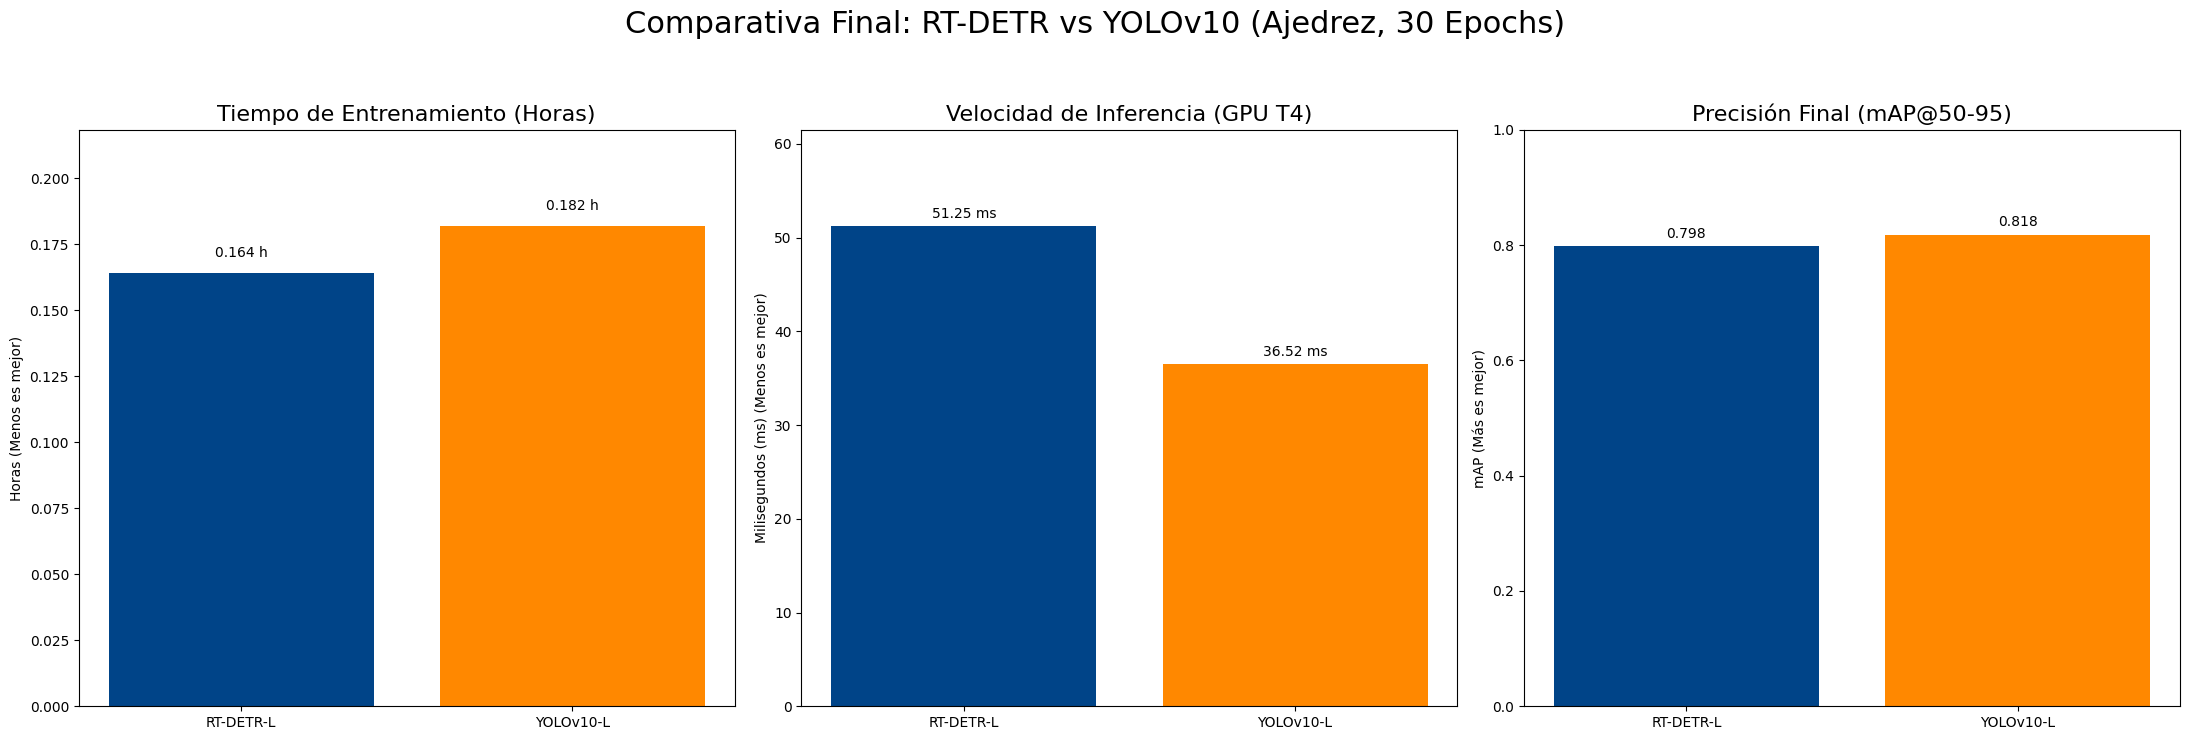

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Definimos los Datos (Basados en tus logs) ---

modelos = ['RT-DETR-L', 'YOLOv10-L']

# Tiempos de Entrenamiento (en horas)
# (RT-DETR: 0.164h, YOLOv10: 0.182h)
tiempos_entrenamiento = [0.164, 0.182]

# Velocidad de Inferencia (en ms)
# (RT-DETR: 51.25ms, YOLOv10: 36.52ms)
tiempos_inferencia_ms = [51.25, 36.52]

# Precisión Final (mAP@50-95)
# (RT-DETR: 0.798, YOLOv10: 0.818)
map_final = [0.798, 0.818]

# --- 2. Creamos los Gráficos ---

plt.figure(figsize=(22, 7)) # Tamaño total de la figura

# --- Gráfico 1: Tiempo de Entrenamiento ---
plt.subplot(1, 3, 1) # 1 Fila, 3 Columnas, Gráfico 1
bars_train = plt.bar(modelos, tiempos_entrenamiento, color=['#004488', '#FF8800']) # Colores azul y naranja
plt.title('Tiempo de Entrenamiento (Horas)', fontsize=16)
plt.ylabel('Horas (Menos es mejor)')
plt.ylim(0, max(tiempos_entrenamiento) * 1.2) # Margen superior
# Añadir etiquetas de valor
for bar in bars_train:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.005, f'{yval:.3f} h', ha='center', va='bottom')

# --- Gráfico 2: Velocidad de Inferencia ---
plt.subplot(1, 3, 2) # 1 Fila, 3 Columnas, Gráfico 2
bars_infer = plt.bar(modelos, tiempos_inferencia_ms, color=['#004488', '#FF8800'])
plt.title('Velocidad de Inferencia (GPU T4)', fontsize=16)
plt.ylabel('Milisegundos (ms) (Menos es mejor)')
plt.ylim(0, max(tiempos_inferencia_ms) * 1.2) # Margen superior
# Añadir etiquetas de valor
for bar in bars_infer:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.5, f'{yval:.2f} ms', ha='center', va='bottom')

# --- Gráfico 3: Precisión Final (mAP) ---
plt.subplot(1, 3, 3) # 1 Fila, 3 Columnas, Gráfico 3
bars_map = plt.bar(modelos, map_final, color=['#004488', '#FF8800'])
plt.title('Precisión Final (mAP@50-95)', fontsize=16)
plt.ylabel('mAP (Más es mejor)')
plt.ylim(0, 1.0) # El mAP siempre es de 0 a 1
# Añadir etiquetas de valor
for bar in bars_map:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f'{yval:.3f}', ha='center', va='bottom')

# Título general
plt.suptitle('Comparativa Final: RT-DETR vs YOLOv10 (Ajedrez, 30 Epochs)', fontsize=22, y=1.05)

plt.tight_layout()
plt.show()